In [5]:
#Import data and dependencies
from __future__ import division
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, to_tree
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

os.chdir('C:\Users\dimit\Desktop\Basketball Analytics\Euroleageeks\Other\Cluster')
data = pd.read_csv('data.csv')
#del data['HT']
names = data['PLAYERS']
del data['PLAYERS']

# some setting for this notebook to actually show the graphs inline
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [6]:
data.head(5)

,HT,FTr,ORB%,DRB%,TRB%,AST%,TO%,STL%,BLK%,USG%,...,Near Basket,Close Jumpers,Long Jumpers,Threes,Long Threes,Left Baseline,Top Left,Top,Top Right,Right Baseline
0,68.3,0.0,4.5,14.7,9.9,9.3,15.8,3.4,1.2,11.6,...,22.2,0.0,0.0,77.8,0.0,0.0,11.1,44.4,44.4,0.0
1,53.7,25.3,3.7,12.3,8.2,13.6,13.9,1.7,2.6,16.3,...,27.3,22.1,3.9,42.9,0.0,3.9,40.3,19.5,31.2,5.2
2,24.4,22.7,1.2,10.8,6.3,45.9,19.5,2.1,0.0,22.6,...,21.6,29.6,17.1,31.8,0.0,3.4,37.5,23.9,33.0,2.3
3,36.6,7.7,0.0,7.0,3.7,13.6,10.6,1.5,0.0,17.1,...,5.5,16.4,23.6,54.6,0.0,0.0,29.1,20.0,49.1,1.8
4,53.7,13.6,5.5,20.0,13.1,6.2,11.3,0.6,0.7,18.0,...,17.5,18.8,5.0,56.3,0.0,6.3,37.5,21.3,31.3,3.8


In [8]:
X = np.array(data)

# generate the linkage matrix
methods = ['single','complete','average']
#method = 
metrics = ['euclidean','cityblock','cosine','hamming']
#metric = 
for meth in methods:
    for metr in metrics:
        Z = linkage(X, method = meth, metric = metr)
        c, coph_dists = cophenet(Z, pdist(X))
        
#average cityblock is the best one
Z = linkage(X, method = 'average', metric = 'euclidean')

c, coph_dists = cophenet(Z, pdist(X))

nodes = pd.DataFrame(leaves_list(Z))
nodes.to_csv('nodes', sep='\t')

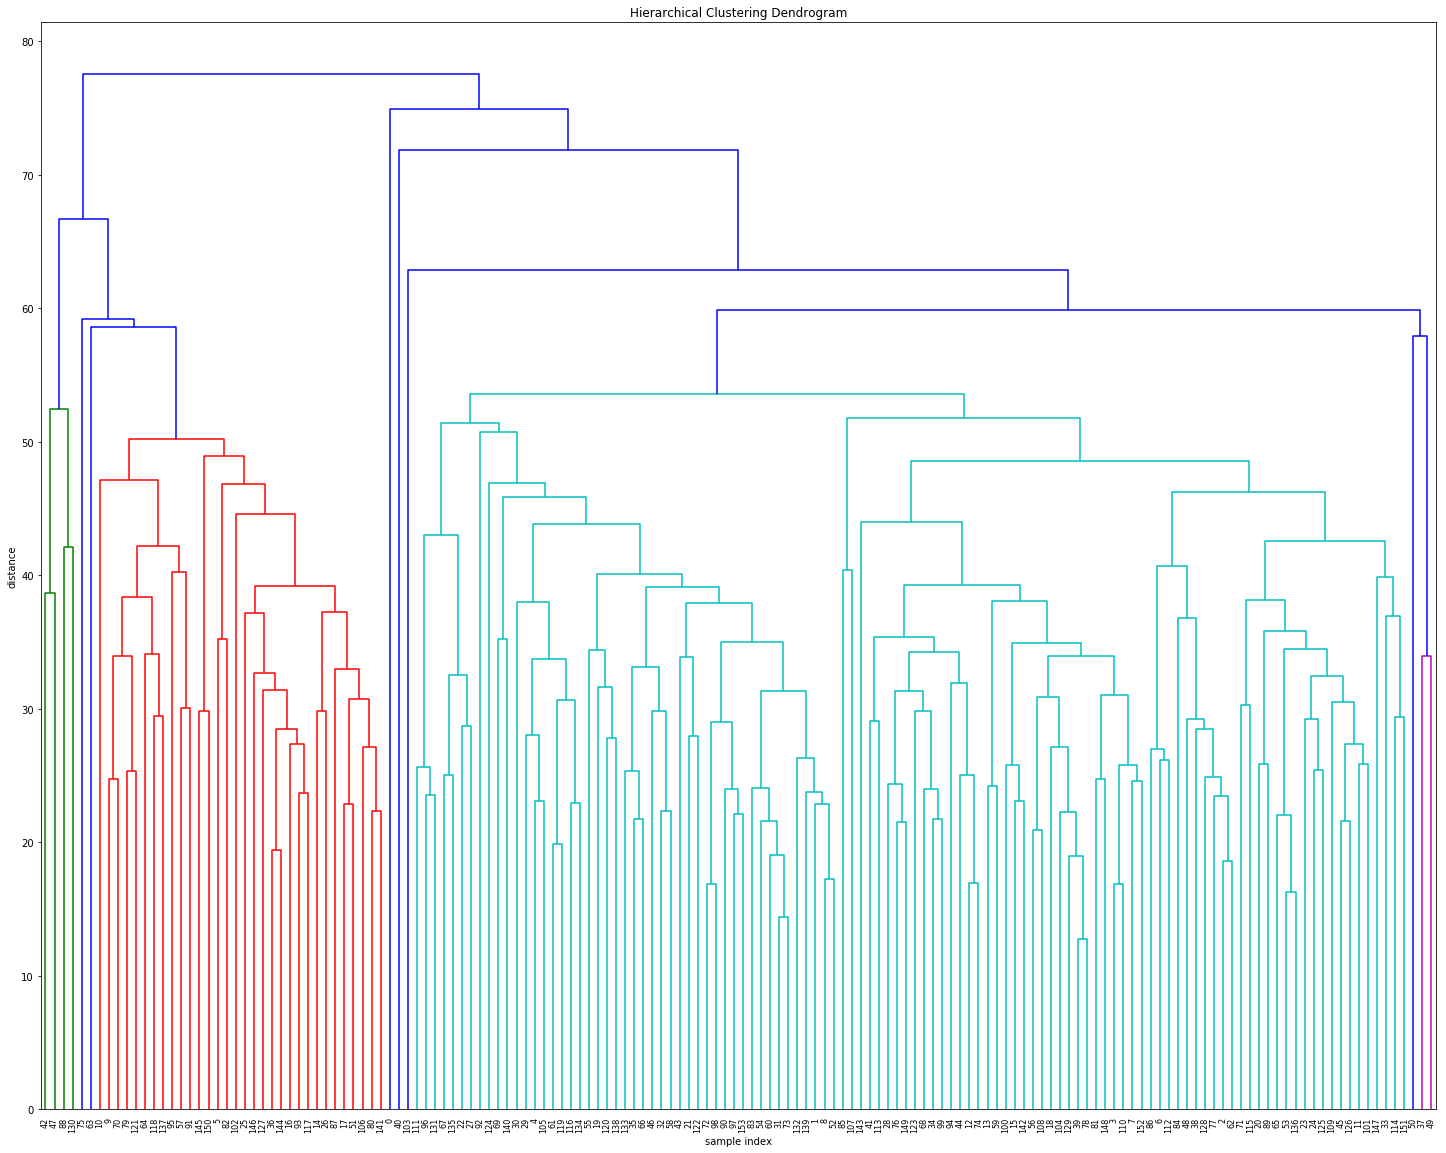

In [9]:
# calculate full dendrogram
plt.figure(figsize=(25, 20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()